In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('laptop_data.csv')

In [5]:
df.head(2)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [7]:
df.shape

(1303, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


# Find the duplicate values

In [12]:
df.duplicated().sum()

0

#### Observation: No duplicated values are present

# Find the missing values

In [18]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

#### Observation: No missing values are available

# Preprocessing of the columns/features

In [24]:
df.head(2)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [26]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [28]:
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)

In [30]:
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)

In [32]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232


# EDA

<Axes: xlabel='Price', ylabel='Density'>

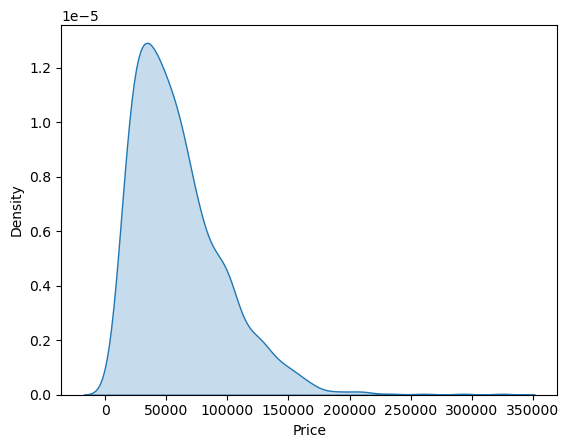

In [37]:
sns.kdeplot(x=df['Price'], fill=True)

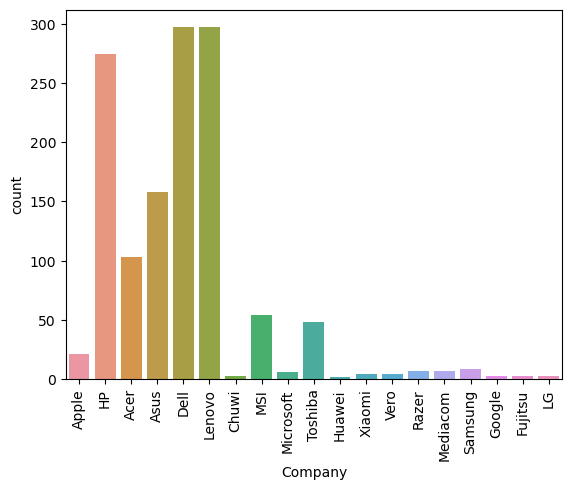

In [40]:
sns.countplot(x=df['Company'])
plt.xticks(rotation=90)
plt.show()

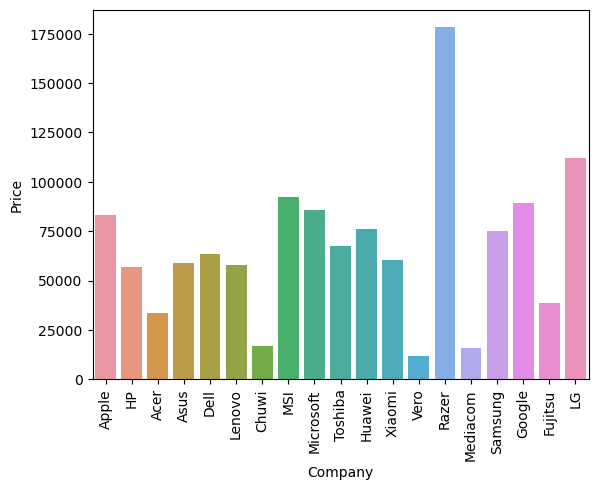

In [43]:
sns.barplot(x=df['Company'], y=df['Price'], errorbar=None)
plt.xticks(rotation=90)
plt.show()

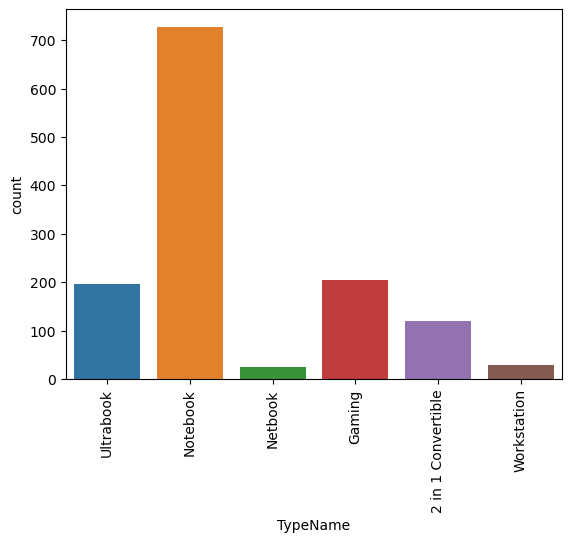

In [46]:
sns.countplot(x=df['TypeName'])
plt.xticks(rotation=90)
plt.show()

In [50]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232


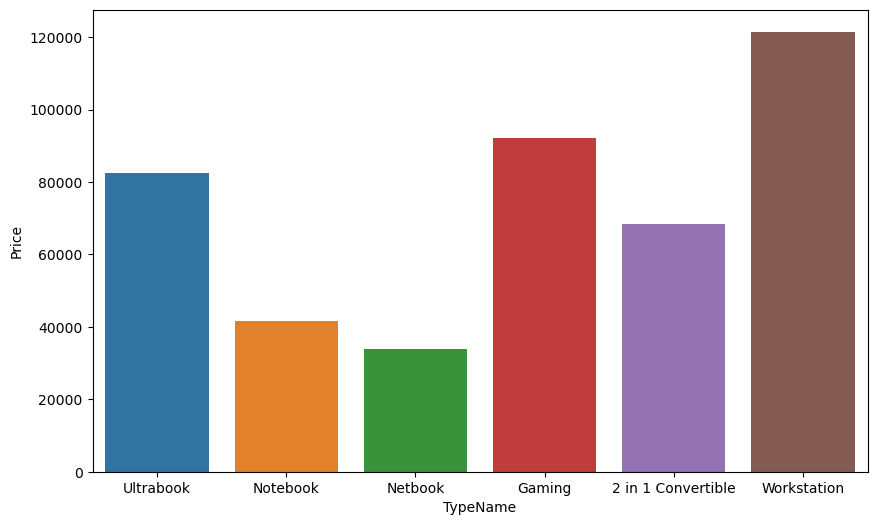

In [52]:
plt.figure(figsize=[10, 6])
sns.barplot(x=df['TypeName'], y=df['Price'], errorbar=None)
plt.show()

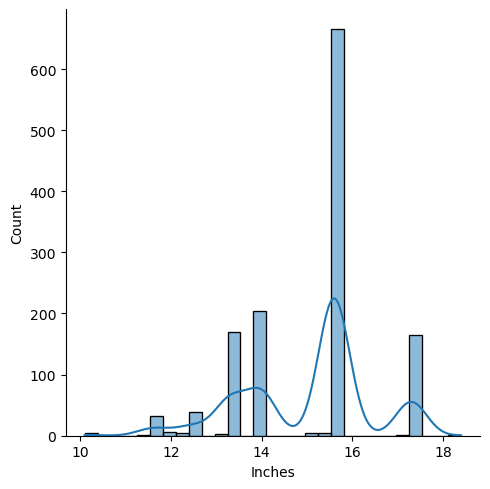

In [54]:
sns.displot(x=df['Inches'], kde=True)

<Axes: xlabel='Inches', ylabel='Price'>

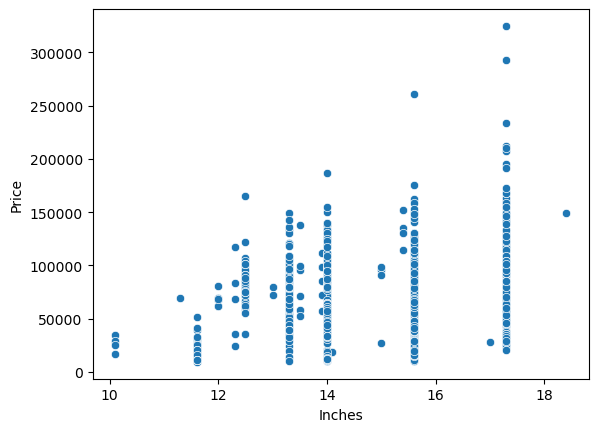

In [56]:
sns.scatterplot(x=df['Inches'], y=df['Price'])

In [58]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [60]:
df['Touchscreen'] = df['ScreenResolution'].str.contains('Touchscreen').astype(int)

In [62]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0


<Axes: xlabel='Touchscreen', ylabel='Price'>

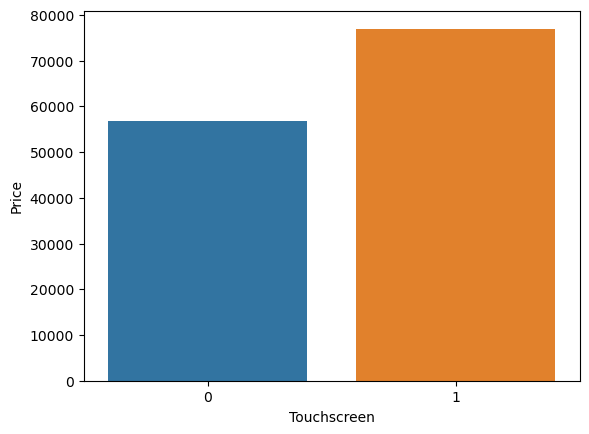

In [65]:
sns.barplot(x=df['Touchscreen'], y=df['Price'], errorbar=None)

# Make a new feature named Ips

In [68]:
df['Ips'] = df['ScreenResolution'].str.contains('IPS').astype(int)

In [70]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<Axes: xlabel='Ips', ylabel='count'>

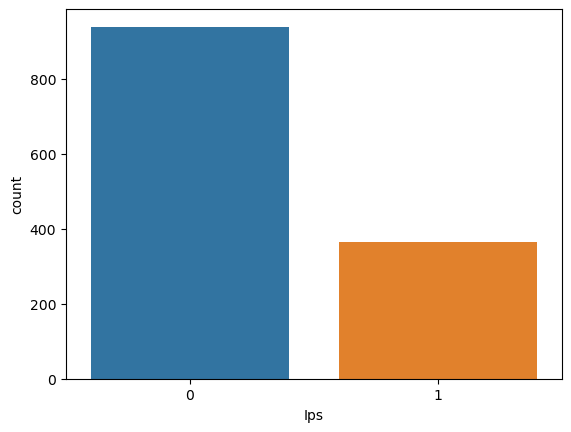

In [72]:
sns.countplot(x=df['Ips'])

<Axes: xlabel='Ips', ylabel='Price'>

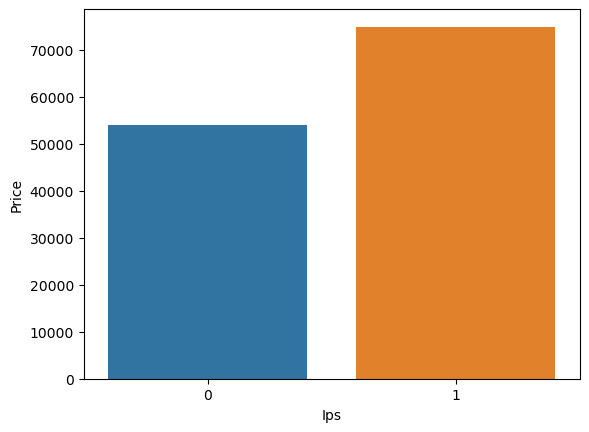

In [74]:
sns.barplot(x=df['Ips'], y=df['Price'], errorbar=None)

# Make 'X_res' and 'Y_res' columns

In [78]:
temp = df['ScreenResolution'].str.split('x', expand=True, n=1)

In [80]:
df['X_res'] = temp[0]
df['Y_res'] = temp[1].astype(int)

In [81]:
df['X_res'] = df['X_res'].str.split(' ').str[-1].astype(int)

In [84]:
df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int64
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price               float64
Touchscreen           int64
Ips                   int64
X_res                 int64
Y_res                 int64
dtype: object

In [87]:
df.corr(numeric_only=True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

# Find the PPI from 'X_res', 'Y_res' and 'Inches'

In [90]:
df['Ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5 / df['Inches']).astype(float)

In [92]:
# See the corr relation of the columns
df.corr(numeric_only=True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Ppi            0.473487
Name: Price, dtype: float64

# Drop unnecessary columns

In [96]:
df.drop(['ScreenResolution'], axis=1, inplace=True)

In [98]:
df.drop(['Inches', 'X_res', 'Y_res'], axis=1, inplace=True)

In [102]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [104]:
df['Cpu Name'] = df['Cpu'].apply(lambda x: ' '.join(x.split(' ')[0:3]))

In [106]:
def fetch_precessor(text):
    if text == 'Intel Core i5' or text=='Intel Core i3' or text=='Intel Core i7':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Precessor'

In [108]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_precessor)

In [111]:
df['Cpu brand'].value_counts()

Cpu brand
Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Precessor             63
Name: count, dtype: int64

<Axes: xlabel='Price', ylabel='Cpu brand'>

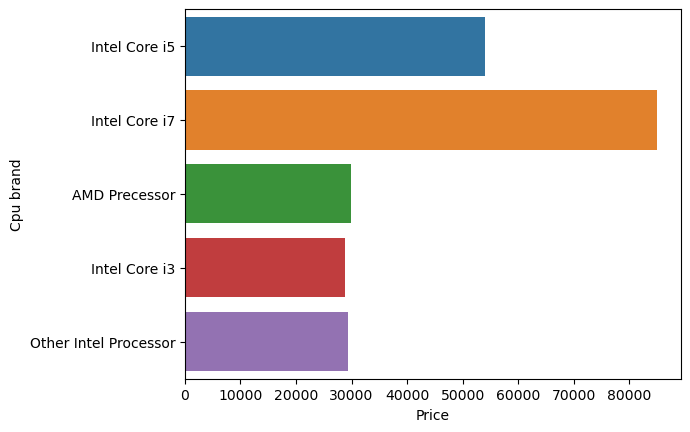

In [114]:
sns.barplot(y=df['Cpu brand'], x=df['Price'], errorbar=None)

# Drop cpu and cpu name columns

In [118]:
df.drop(['Cpu', 'Cpu Name'], axis=1, inplace=True)

In [120]:
df.head(2)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5


In [123]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [127]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df['Memory'] = df['Memory'].str.replace('GB', '')
df['Memory'] = df['Memory'].str.replace('TB', '000')
new = df['Memory'].str.split('+', expand=True, n=1)
df['First'] = new[0]
df['Second'] = new[1]
df['First'] = df['First'].str.strip()

df['Layer1HDD'] = df['First'].apply(lambda x:1 if 'HDD' in x else 0)
df['Layer1SSD'] = df['First'].apply(lambda x:1 if 'SSD' in x else 0)
df['Layer1Flash_Storage'] = df['First'].apply(lambda x:1 if 'Flash Storage' in x else 0)
df['Layer1Hybrid'] = df['First'].apply(lambda x:1 if 'Hybrid' in x else 0)

df['First'] = df['First'].str.replace(r'\D','', regex=True)
df['Second'].fillna('0', inplace=True)

df['Layer2HDD'] = df['Second'].apply(lambda x:1 if 'HDD' in x else 0)
df['Layer2SSD'] = df['Second'].apply(lambda x:1 if 'SSD' in x else 0)
df['Layer2Flash_storage'] = df['Second'].apply(lambda x:1 if 'Flash Storage' in x else 0)
df['Layer2Hybride'] = df['Second'].apply(lambda x:1 if 'Hybrid' in x else 0)

df['Second'] = df['Second'].str.replace(r'\D', '', regex=True)
df['First'] = df['First'].astype(int)
df['Second'] = df['Second'].astype(int)

df['HDD'] = (df['First'] * df['Layer1HDD'] + df['Second'] * df['Layer2HDD'])
df['SSD'] = (df['First'] * df['Layer1SSD'] + df['Second'] * df['Layer2SSD'])
df['Hybrid'] = (df['First']*df['Layer1Hybrid'] + df['Second']*df['Layer2Hybride'])
df['Flash_Storage'] = (df['First']*df['Layer1Flash_Storage'] + df['Second']*df['Layer2Flash_storage'])

df.drop(['Memory', 'First', 'Second',
       'Layer1HDD', 'Layer1SSD', 'Layer1Flash_Storage', 'Layer1Hybrid',
       'Layer2HDD', 'Layer2SSD', 'Layer2Flash_storage', 'Layer2Hybride'], axis=1, inplace=True)

In [131]:
df.corr(numeric_only=True)['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
Ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [133]:
df.drop(['Hybrid', 'Flash_Storage'], axis=1, inplace=True)

In [136]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [138]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [141]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split(' ')[0])

In [143]:
df.drop('Gpu', axis=1, inplace=True)

In [145]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [147]:
df = df[df['Gpu brand'] != 'ARM']

<Axes: xlabel='Price', ylabel='Gpu brand'>

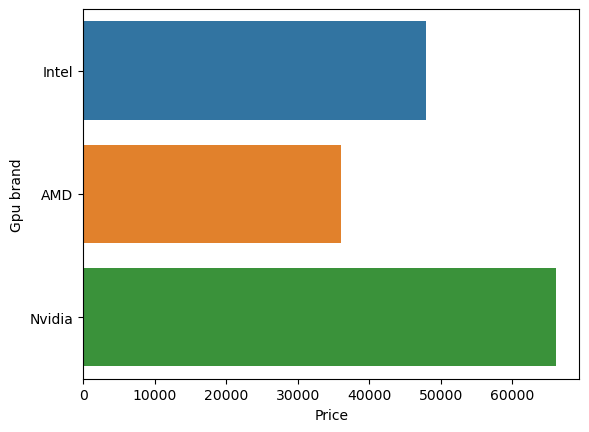

In [151]:
sns.barplot(x=df['Price'], y=df['Gpu brand'], errorbar=None, estimator='median')

In [154]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,Ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [156]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [159]:
def cat_os(inp):
    if 'Windows' in inp:
        return 'Windows'
    elif inp=='macOS' or inp=='Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [161]:
df['os'] = df['OpSys'].apply(cat_os)

In [163]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,Ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [166]:
df.drop('OpSys', axis=1, inplace=True)

In [169]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


<Axes: xlabel='Price', ylabel='os'>

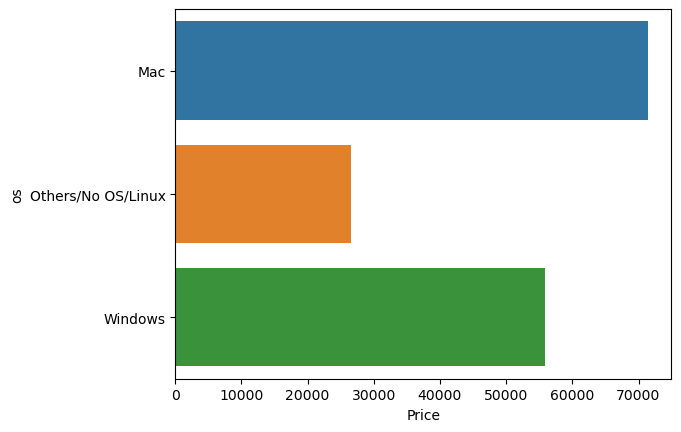

In [171]:
sns.barplot(x=df['Price'], y=df['os'], errorbar=None, estimator='median')

<Axes: >

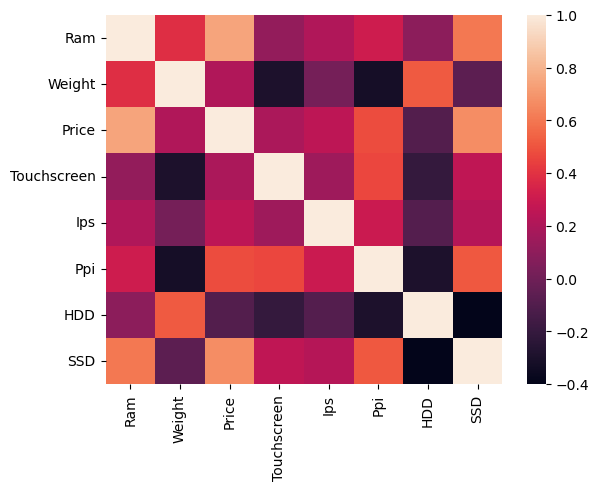

In [174]:
sns.heatmap(df.corr(numeric_only=True))

<Axes: xlabel='Price', ylabel='Density'>

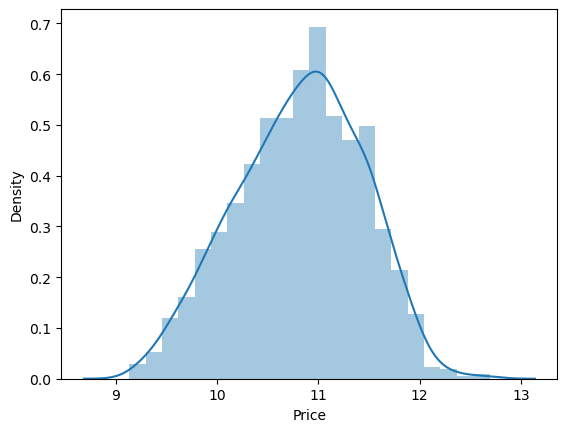

In [176]:
sns.distplot(np.log(df['Price']))

In [178]:
df.head(2)

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac


# Train test split

In [181]:
X = df.drop('Price', axis=1)
y = np.log(df['Price'])

In [183]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

In [185]:
categorical_columns = [0,1,7,10,11]

In [188]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [190]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_absolute_error

In [192]:
step1 = ColumnTransformer(transformers=[
    ('col_trf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=200,
                                      min_samples_split=5, 
                                      min_samples_leaf=1, 
                                      max_features='sqrt', 
                                      max_depth=None,
                                      bootstrap=False)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

R2 Score: 0.907580881867546
MAE: 0.14396137690768843


In [194]:
import pickle

pickle.dump(df, open('df.pkl', 'wb'))
pickle.dump(pipe, open('pipe.pkl', 'wb'))

In [237]:
ohe_encoding = ColumnTransformer(transformers=[
    ('col_trf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

X_train_transformed = ohe_encoding.fit_transform(X_train)
X_test_transformed = ohe_encoding.transform(X_test)

In [247]:
ohe_feature_names = ohe_encoding.named_transformers_['col_trf'].get_feature_names_out()

In [277]:
remaining_columns = X_train.drop(columns=X_train.columns[categorical_columns], axis=1).columns

In [281]:
new_col_names = list(ohe_feature_names) + list(remaining_columns)

In [283]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns=new_col_names)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=new_col_names)

In [287]:
models = {
    'LinearRegression' : LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor(),
    'Tree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'GradientBoost': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'ExtraTrees': ExtraTreesRegressor(),
    'XGB': XGBRegressor()
}

In [291]:
for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train_transformed, y_train)

    y_pred = model.predict(X_test_transformed)
    print(f"----------{list(models.keys())[i]}----------")
    print(f"R2 score: {r2_score(y_test, y_pred)}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}\n\n")

    print("*"*15)

----------LinearRegression----------
R2 score: 0.8073277450155145
MAE: 0.21017827953019053


***************
----------Ridge----------
R2 score: 0.8094565445207293
MAE: 0.20962006676503445


***************
----------Lasso----------
R2 score: 0.5043384149461754
MAE: 0.34648236730039556


***************
----------SVR----------
R2 score: 0.6110651796605415
MAE: 0.29589873333886324


***************
----------KNN----------
R2 score: 0.8022577481263032
MAE: 0.20013885517594093


***************
----------Tree----------
R2 score: 0.797079373081718
MAE: 0.20139177804090613


***************
----------RandomForest----------
R2 score: 0.8863540379672479
MAE: 0.1547550712612988


***************
----------GradientBoost----------
R2 score: 0.8673842965348606
MAE: 0.17533210216396275


***************
----------AdaBoost----------
R2 score: 0.7991579698558897
MAE: 0.22637674946986458


***************
----------ExtraTrees----------
R2 score: 0.8684975130877215
MAE: 0.16095529680199064


*********

In [293]:
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

In [301]:
randomized_cv = [
    ('RandomForest', RandomForestRegressor(), param_grid)
]

In [303]:
from sklearn.model_selection import RandomizedSearchCV

model_params = {}

for name, model, param in randomized_cv:
    rcv = RandomizedSearchCV(estimator=model, param_distributions=param,
                             n_iter=100,
                             cv=5, 
                             verbose=2, 
                             n_jobs=1)
    rcv.fit(X_train_transformed, y_train)
    model_params[name] = rcv.best_params_

for name in model_params:
    print(f"----------{name}----------")
    print(model_params[name])

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_es

In [305]:
random_forest = RandomForestRegressor(n_estimators=200,
                                      min_samples_split=5, 
                                      min_samples_leaf=1, 
                                      max_features='sqrt', 
                                      max_depth=None,
                                      bootstrap=False)

random_forest.fit(X_train_transformed, y_train)
y_pred = random_forest.predict(X_test_transformed)
print(f"R2 score: {r2_score(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

R2 score: 0.9044551922672539
MAE: 0.14580245272836487


# Exporting the model

In [333]:
import pickle

pickle.dump(df, open('df.pkl', 'wb'))
pickle.dump(random_forest, open('pipe.pkl', 'wb'))

In [335]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
